In [1]:
state = 'IA' 
year = 2020
obj_type = 'cut_edges'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of IA has 4 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from IA_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 5000 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
import time

start_time = time.perf_counter()
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )
print("Total time for epsilon constraint method =", round(time.perf_counter() - start_time, 2))

Initially, L = 789617 and U = 805568 and k = 4.

****************************************
Trying deviation = 7975.922500000001
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 8, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [5, 6, 7, 11, 13, 15, 29, 34, 36, 45, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 10, 14, 16, 17, 19, 23, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 81, 89, 91, 93]]
Objective value: 32
Deviation: 5691.75

****************************************
Running labeling model!
****************************************
L = 789617 and U = 805568
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1, 1, 1]
Solving the max B problem (as MIP) for use in the vertex

  1310   698   26.15691   15  560   33.00000   21.75136  34.1%   210   10s
  2125   964     cutoff   16        33.00000   22.70357  31.2%   211   15s
  2775  1099   26.57797    8  531   33.00000   23.50714  28.8%   221   20s
  3587  1153   27.29824   12  577   33.00000   24.08592  27.0%   239   25s
  4215  1225   31.82004   21  452   33.00000   24.51423  25.7%   248   30s
  4901  1244     cutoff   13        33.00000   24.98629  24.3%   259   35s
  5324  1299 infeasible   15        33.00000   25.14889  23.8%   262   41s
  5708  1337   28.00393   13  310   33.00000   25.43314  22.9%   265   45s
  6397  1377   28.78549   11  636   33.00000   25.74836  22.0%   266   50s
  7123  1393   31.98974   12  478   33.00000   26.03046  21.1%   269   55s
  7569  1405   30.25880   18  566   33.00000   26.21085  20.6%   275   60s
  8450  1420   31.56331   13  413   33.00000   26.61540  19.3%   276   65s
  8942  1428   30.55856   17  604   33.00000   26.77631  18.9%   278   70s
 10045  1421   30.15037  


****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[4, 8, 10, 16, 17, 49, 50, 93], [5, 6, 7, 11, 13, 15, 29, 34, 36, 45, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92]]

****************************************
Trying deviation = 4587.625
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.04257    0  481   33.00000   11.04257  66.5%     -    0s
     0     0   11.42694    0  494   33.00000   11.42694  65.4%     -    0s
     0     0   11.53054    0  496   33.00000   11.53054  65.1%     -    0s
     0     0   11.74202    0  507   33.00000   11.74202  64.4%     -    0s
     0     0   11.74899    0  505   33.00000   11.74899  64.4%     -    0s
     0     0   11.74899    0  497   33.00000   11.74899  64.4%     -    0s
     0     0   11.82161    0  492   33.00000   11.82161  64.2%     -    1s
     0     0   11.86787    0  498   33.00000   11.86787  64.0%     -    1s
     0     0   11.90030    0  497   33.00000   11.90030  63.9%     -    1s
     0     0   11.90368    0  513   33.00000   11.90368  63.9%     -    1s
     0     0   11.90864    0  507   33.00000   11.90864  63.9%     -    1s
     0     0   11.90909

 39727 33970   38.95562   29  370          -   25.35219      -   113   82s
 41463 34968   48.60534   44  398          -   25.35219      -   113   85s
 44593 38331   45.12809   35  304          -   25.95819      -   115   93s
 46490 40119   58.85605  108  169          -   25.95819      -   116   95s
 49856 43128   41.58059   57   82          -   25.95819      -   116  100s
 54736 47044   31.04853   23  506          -   25.95819      -   116  105s
 59268 49303   29.34901   25  486          -   25.95819      -   117  111s
 61638 53083   44.89109   44   86          -   26.59634      -   118  116s
 66072 56350   46.26968   78  173          -   26.72126      -   118  122s
H69214 24805                      48.0000000   26.72126  44.3%   119  124s
 70124 24379     cutoff   85        48.00000   27.07936  43.6%   119  127s
 72658 26009   34.02233   30  406   48.00000   27.20491  43.3%   121  131s
 74880 26609   33.24675   25  553   48.00000   27.62354  42.5%   123  136s
H74963 16670             

 280902 22768   34.17174   44  210   36.00000   33.23285  7.69%   177  592s
 283086 22059 infeasible   60        36.00000   33.29848  7.50%   177  596s
 285116 21196 infeasible   42        36.00000   33.35369  7.35%   177  600s
 289160 19304     cutoff   60        36.00000   33.46989  7.03%   177  607s
 291265 18335   33.72870   43  293   36.00000   33.54970  6.81%   177  611s
 295284 15862 infeasible   45        36.00000   33.68768  6.42%   177  618s
 297260 14490     cutoff   35        36.00000   33.76574  6.21%   177  621s
 299392 13016     cutoff   34        36.00000   33.85916  5.95%   177  625s
 303240  9952     cutoff   42        36.00000   34.06239  5.38%   177  632s
 305318  8112     cutoff   45        36.00000   34.19048  5.03%   177  635s
*306769   320              47      35.0000000   34.20229  2.28%   177  635s

Cutting planes:
  Lazy constraints: 503

Explored 307401 nodes (54362037 simplex iterations) in 636.28 seconds (429.21 work units)
Thread count was 20 (of 20 avail

 142074 119914   42.80796   44  337          -   25.92072      -  96.5  265s
 145825 123374   59.58072   88   89          -   25.92072      -  96.8  271s
 148145 125112   48.47782   53  188          -   25.92072      -  96.8  275s
H150202 11357                      37.0000000   25.92072  29.9%  96.8  275s
H150302  8342                      36.0000000   25.92072  28.0%  96.8  277s
 151737  8531   32.65095   29  278   36.00000   26.37153  26.7%  97.8  281s
 153088  8739     cutoff   35        36.00000   26.55263  26.2%  98.9  287s
 153464  8802     cutoff   27        36.00000   26.70521  25.8%  99.2  290s
 154237  8910     cutoff   27        36.00000   26.78945  25.6%   100  296s
 155348  9114   32.74931   26  429   36.00000   26.86321  25.4%   101  304s
 156074  9194   33.34187   28  438   36.00000   27.00801  25.0%   101  307s
 156837  9283   33.05474   25  544   36.00000   27.10694  24.7%   102  311s
 157571  9368   34.16923   23  397   36.00000   27.21392  24.4%   102  315s
 159062  

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 4751 rows, 4200 columns and 16291 nonzeros
Model fingerprint: 0xb8c8999b
Variable types: 1188 continuous, 3012 integer (3012 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolve removed 2229 rows and 1803 columns
Presolve time: 0.06s
Presolved: 2522 rows, 2397 columns, 9156 nonzeros
Variable types: 

 204443 168191   36.93214   29  363          -   27.51808      -  97.0  414s
 205894 169863   51.01650   55  291          -   27.51808      -  97.1  419s
 207835 171451   35.20102   21  536          -   27.51966      -  97.2  424s
 209746 172879   37.77169   30  360          -   27.51966      -  97.3  428s
 211507 174603   59.88595   90  133          -   27.51966      -  97.4  433s
 213506 176178   40.56757   58  235          -   27.51966      -  97.5  438s
 215393 177870   42.67665   29  423          -   27.51966      -  97.6  442s
 217368 179488   60.14298   91   43          -   27.51966      -  97.6  447s
 219386 181365   42.07704   28  420          -   27.51966      -  97.6  452s
 221669 182716   67.09014   55  270          -   27.51966      -  97.6  457s
 223220 184517   39.21044   31  466          -   27.51966      -  97.8  462s
 225379 185921   63.41554   98   90          -   27.69785      -  97.8  467s
 227085 187529   49.60306   52  226          -   27.69785      -  97.9  472s

 394225 324981   45.12159   52  168          -   28.92972      -   103  967s
 395828 326455   44.84393   64  280          -   28.92972      -   104  973s
 397752 327988   38.46335   29  315          -   29.02706      -   104  978s
 399621 329399   60.05522   63  144          -   29.02706      -   104  984s
 401473 330739   45.62556   40  306          -   29.03024      -   104  989s
 403014 332500   59.34905  101   55          -   29.03024      -   104  994s
 403554 332500   39.91311   56  228          -   29.03024      -   104  995s
 405156 333169   55.22190   43  321          -   29.03024      -   104 1001s
 405988 334479   58.48543   76  141          -   29.03024      -   104 1006s
 407576 336123   47.59633   39  236          -   29.03024      -   104 1012s
 409553 337548   36.60541   24  508          -   29.03024      -   104 1017s
 411256 338993   49.04348   59  207          -   29.03024      -   104 1023s
 413023 340391   47.55299   30  427          -   29.03024      -   104 1029s

 566397 465490   58.62805   73   47          -   29.85341      -   107 1739s
 568095 467085   37.74578   27  540          -   29.85757      -   107 1747s
 570258 468390   58.56148   44  369          -   29.85757      -   107 1756s
 571824 469835   74.27010   82  189          -   29.85757      -   107 1764s
 573571 471425   43.44004   40  325          -   29.85757      -   107 1773s
 575492 472745   38.27357   22  337          -   29.85757      -   107 1781s
 577114 474282   46.74332   60  330          -   29.85757      -   107 1792s
 579022 475754   40.18453   31  521          -   29.85757      -   107 1800s
 580791 477361   50.55335   96   84          -   29.85757      -   107 1809s
 582455 477362   57.34130   70  140          -   29.85757      -   107 1810s
 582698 478749   52.60669   48  207          -   29.93937      -   107 1818s
 584390 480075   40.17454   25  509          -   29.94016      -   107 1827s
 586052 481666   55.60299   82  200          -   29.94016      -   107 1835s

 734677 601568   36.17334   28  485          -   30.49157      -   110 2656s
 735099 603237   48.50287   36  266          -   30.49157      -   110 2668s
 737379 604483   34.21645   28  271          -   30.49157      -   110 2677s
 738861 606275   53.11252   74  319          -   30.49157      -   110 2688s
 741210 607670   67.77286  122   79          -   30.49157      -   110 2698s
 743070 609216   41.54020   43  322          -   30.49157      -   110 2708s
 745030 610413   66.50222  109  143          -   30.49157      -   110 2716s
 746574 611947   43.89691   68  225          -   30.53926      -   110 2726s
 748440 613104   49.06088   41  258          -   30.53926      -   110 2733s
 749830 614600   36.55210   31  470          -   30.55216      -   110 2742s
 751702 616109   41.17290   84   72          -   30.55216      -   110 2750s
 753555 617560   52.30266   40  460          -   30.55216      -   110 2762s
 755388 619243   35.81189   25  492          -   30.55216      -   110 2770s

 899629 736384   46.68032   61  308          -   30.97094      -   112 3460s
 901196 737768   52.67892   39  332          -   30.97094      -   112 3466s
 902904 739221   35.24427   27  454          -   30.97094      -   112 3474s
 904661 740618   52.04488   45  269          -   30.97094      -   112 3480s
 906404 741975   35.28947   23  372          -   30.97423      -   112 3488s
 907990 743498   47.25834   41  230          -   30.97423      -   112 3494s
 908877 743498   42.54229   50  120          -   30.99285      -   112 3495s
 909902 744821   44.68417   30  236          -   30.99285      -   112 3502s
 911490 746127   58.98573   71  257          -   30.99285      -   112 3509s
 913069 747515   46.58117   28  319          -   30.99285      -   112 3517s
 914826 747791   34.32269   29  361          -   31.01834      -   112 3526s
 915138 749006   43.64111   35  518          -   31.01834      -   112 3532s
 916641 750322   44.55691   59  180          -   31.01834      -   112 3538s

 1070304 874971   34.64452   31  431          -   31.34743      -   113 4239s
 1072102 876311   59.43032   62  310          -   31.34743      -   113 4245s
 1073754 877802   45.49792   31  533          -   31.34743      -   113 4254s
 1075553 879088   54.46460   76  222          -   31.34743      -   113 4261s
 1077166 880485   50.45182   32  332          -   31.34743      -   113 4269s
 1078681 880485   35.10413   47  215          -   31.37009      -   113 4270s
 1078789 880779   43.69704   34  148          -   31.37009      -   113 4279s
 1079168 882109 infeasible   45               -   31.37009      -   113 4288s
 1080904 883303   37.84036   31  382          -   31.37009      -   113 4295s
 1082252 884683   47.77035   45  381          -   31.38063      -   113 4302s
 1084026 886044   41.96651   30  466          -   31.38082      -   113 4310s
 1085684 887520   57.94941   61   80          -   31.38082      -   113 4316s
 1087540 888991   50.72814   43  147          -   31.38082      

 1242357 1012526   38.50168   38  274          -   31.65462      -   114 5129s
 1244050 1013501   36.10979   37  281          -   31.65462      -   114 5139s
 1245288 1014926   49.89511   56  286          -   31.65462      -   114 5149s
 1247039 1016316   49.05253   42  131          -   31.65462      -   114 5157s
 1248756 1017424   39.43223   43  317          -   31.65462      -   114 5166s
 1250030 1018853   46.52794   42  216          -   31.65462      -   114 5175s
 1251809 1020261   36.34584   34  394          -   31.68056      -   114 5183s
 1253598 1021863   53.20761   64  169          -   31.68056      -   114 5192s
 1255685 1022844   45.64575   33  237          -   31.68056      -   114 5201s
 1256945 1024294   54.40913   46  336          -   31.68056      -   114 5211s
 1258741 1025690   38.37447   38  340          -   31.68056      -   114 5218s
 1260398 1027092   51.58365   34  243          -   31.68056      -   114 5228s
 1262061 1028473   33.31340   31  301          -   3

 1345277 67345     cutoff   29        38.00000   32.38269  14.8%   117 6003s
 1346078 67413   34.98252   66  205   38.00000   32.39293  14.8%   117 6010s
 1347016 67482     cutoff   26        38.00000   32.39771  14.7%   117 6018s
 1347934 67589   33.92861   25  521   38.00000   32.40924  14.7%   117 6028s
 1348707 67762   35.77563   31  390   38.00000   32.41658  14.7%   117 6035s
 1349726 67895   32.93384   25  411   38.00000   32.43112  14.7%   117 6041s
 1350707 68032 infeasible   32        38.00000   32.43802  14.6%   117 6048s
 1351526 68183   34.15737   27  390   38.00000   32.44521  14.6%   117 6053s
 1352526 68393     cutoff   26        38.00000   32.46176  14.6%   117 6059s
 1353628 68449   33.38855   31  354   38.00000   32.47295  14.5%   117 6066s
 1354316 68513   34.94389   37  243   38.00000   32.47850  14.5%   117 6071s
 1355362 68587 infeasible   33        38.00000   32.49141  14.5%   117 6076s
 1356399 68708   33.85197   28  373   38.00000   32.50532  14.5%   117 6084s

 1484490 45848 infeasible   25        37.00000   33.93535  8.28%   121 7133s
 1486510 45468   35.70181   21  511   37.00000   33.95893  8.22%   121 7153s
 1488848 45154 infeasible   50        37.00000   33.99034  8.13%   121 7171s
 1490828 44618     cutoff   35        37.00000   34.00855  8.09%   121 7189s
 1492971 44316     cutoff   42        37.00000   34.03654  8.01%   121 7200s

Cutting planes:
  Lazy constraints: 1954

Explored 1494383 nodes (181044667 simplex iterations) in 7201.90 seconds (2309.42 work units)
Thread count was 20 (of 20 available processors)

Solution count 4: 37 38 40 41 

Time limit reached
Best objective 3.700000000000e+01, best bound 3.500000000000e+01, gap 5.4054%

User-callback calls 3070933, time in user-callback 40.93 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
plan = [[4, 8, 16, 17, 18, 49, 53, 93], [3, 12, 24, 25, 26, 

 138176 113242   48.75133   66   54          -   27.67287      -  85.2  305s
 138384 113451   45.45226   31  273          -   27.67287      -  85.1  312s
 138595 115747   45.28549   31  256          -   27.67287      -  85.2  318s
 141567 117224   63.30874   74  207          -   27.84833      -  85.0  323s
 143643 119219   39.39269   36  428          -   27.84833      -  85.0  328s
 145953 120808   56.40605  128   52          -   27.85167      -  85.0  332s
 147851 122701   44.06998   55  186          -   27.85167      -  85.2  337s
 150331 124294   68.48397  128   76          -   27.85167      -  85.1  342s
 152203 126100   45.94534   42  250          -   27.85167      -  85.3  346s
 154490 127534   54.38251   82  141          -   27.91037      -  85.3  352s
 156163 129344   35.92477   23  320          -   27.91037      -  85.3  356s
 158358 131413   46.09358   59   96          -   28.07724      -  85.3  361s
 160843 133170   40.13837   33  343          -   28.08114      -  85.3  366s

 346271 288732   45.59875   78  102          -   29.67949      -  90.9  856s
 348452 290766   39.79402   33  381          -   29.67949      -  90.9  861s
 350850 292346   50.26942  102   86          -   29.67949      -  90.9  867s
 352690 293856   44.92105   80   49          -   29.79548      -  90.9  871s
 354537 295830   38.15141   42  148          -   29.80816      -  91.0  876s
 356948 297371   30.25328   31  352          -   29.83118      -  90.9  882s
 358725 298904   41.32099  104  119          -   29.83118      -  91.0  886s
 360634 300695   47.87967   41  198          -   29.83118      -  91.0  891s
 362852 300894   57.45144  112   98          -   29.83576      -  91.1  897s
 363065 302388   70.65037  114   66          -   29.83576      -  91.1  903s
 364881 304007   44.39952   45  223          -   29.83576      -  91.2  909s
 366868 305765   35.95875   31  316          -   29.83576      -  91.2  914s
 368942 307242   36.80865   33  405          -   29.83576      -  91.2  919s

 551560 458627   41.77842   26  368          -   30.70356      -  93.8 1426s
 553792 460025   48.50337   61  307          -   30.70356      -  93.8 1431s
 555499 461806   43.04416   30  250          -   30.70356      -  93.8 1437s
 557671 463318   42.23466   42  285          -   30.75568      -  93.8 1442s
 559497 464910   34.20393   24  398          -   30.75568      -  93.8 1449s
 561458 466297   39.39420   42  117          -   30.75568      -  93.9 1454s
 563134 466508   35.07717   26  504          -   30.75568      -  93.9 1463s
 563351 468049   35.50610   27  487          -   30.75568      -  93.9 1469s
 565314 469645   51.21887   50  189          -   30.75568      -  94.0 1476s
 567288 471273   37.28433   33  169          -   30.75568      -  94.0 1483s
 569221 473035   43.17175   53  103          -   30.80072      -  94.0 1488s
 571445 474122   41.45081   31  322          -   30.80072      -  94.0 1494s
 572702 475924   57.64830   57   64          -   30.81077      -  94.1 1500s

 751033 621117   37.67617   37  464          -   31.30783      -  95.6 2066s
 752874 621734   53.19885   91   67          -   31.30783      -  95.6 2071s
 753607 623440   37.96328   28  445          -   31.30783      -  95.6 2078s
 755859 624891   42.15797   53  104          -   31.33160      -  95.6 2083s
 757648 626529   34.68071   21  405          -   31.33160      -  95.6 2089s
 759472 626529   47.74158   55  311          -   31.33160      -  95.6 2090s
 759611 627951   53.16357   60   77          -   31.33160      -  95.6 2096s
 761366 629355   45.51244   42  193          -   31.34408      -  95.6 2102s
 763084 630694   34.72530   44  228          -   31.34408      -  95.7 2107s
 764715 631994   42.93654   29  430          -   31.34408      -  95.7 2112s
 766330 633531   52.27154   74  270          -   31.34408      -  95.7 2119s
 768291 635013   49.24073   43  219          -   31.34408      -  95.8 2124s
 770100 636567   35.14949   32  251          -   31.34408      -  95.8 2130s

 938278 772989   41.67023   30  531          -   31.71199      -  96.7 2724s
 939921 774661   33.58424   33  419          -   31.71199      -  96.7 2729s
 941448 774661   59.00432   54   64          -   31.71199      -  96.7 2730s
 942013 776254   44.43288   55  307          -   31.71199      -  96.7 2737s
 943897 777727   42.60045   36  359          -   31.71199      -  96.7 2743s
 945653 779296   60.55517   61  316          -   31.71199      -  96.7 2749s
 947591 780708   35.32679   31  322          -   31.71199      -  96.8 2756s
 949241 782304   39.81391   62  172          -   31.73865      -  96.8 2763s
 951305 783709   43.62693   32  329          -   31.74376      -  96.8 2770s
 953007 785417 infeasible  108               -   31.74376      -  96.8 2776s
 955120 786984   51.65125   55  213          -   31.75040      -  96.8 2783s
 957030 788548   42.32716   31  190          -   31.75040      -  96.8 2790s
 958882 790077   47.47029  100  188          -   31.75040      -  96.8 2795s

 1126140 926497   44.66973   42   84          -   32.04873      -  97.7 3365s
 1127843 928181   45.85429   41  247          -   32.04873      -  97.7 3371s
 1129996 929895   37.26794   34  329          -   32.04947      -  97.7 3378s
 1132093 931499 infeasible  101               -   32.04947      -  97.7 3387s
 1134131 932707   45.03958   40  272          -   32.04947      -  97.7 3395s
 1135648 934063   50.37660   78  180          -   32.06382      -  97.7 3402s
 1137227 935371   42.16029   45  298          -   32.06570      -  97.8 3410s
 1138963 935649   40.99496   31  286          -   32.06941      -  97.8 3419s
 1139247 937126   38.68589   33  285          -   32.06941      -  97.8 3427s
 1141051 938387   56.78776   99   72          -   32.07046      -  97.8 3434s
 1142572 939828   40.57780   38  497          -   32.07046      -  97.8 3442s
 1144391 941335   53.99909   56  196          -   32.07427      -  97.9 3449s
 1146335 942821   38.08511   29  345          -   32.07633      

 1312241 1077678   39.20478   36  563          -   32.28039      -  98.5 4261s
 1314355 1079239 infeasible  119               -   32.28039      -  98.5 4269s
 1316210 1080721   48.87058   78  139          -   32.30165      -  98.5 4279s
 1318055 1082423   43.24155   56  370          -   32.30165      -  98.5 4289s
 1320101 1084126   41.87010   31  335          -   32.30567      -  98.5 4297s
 1322249 1085550   46.12273   78   90          -   32.30682      -  98.5 4306s
 1324095 1086951   36.84778   41  242          -   32.30682      -  98.5 4317s
 1325905 1088349   39.43836   45  139          -   32.30713      -  98.5 4325s
 1327655 1089236   45.42350   44   92          -   32.30713      -  98.5 4335s
 1328665 1090422   37.63702   27  504          -   32.31235      -  98.6 4343s
 1330104 1092161   52.96082   41  109          -   32.31235      -  98.6 4354s
 1330882 1092161   36.23605   41  150          -   32.31499      -  98.6 4355s
 1332362 1093276   64.31972   76   99          -   3

 1487918 1218336   32.93668   36  404          -   32.50189      -  99.1 5225s
 1489838 1219839   42.32584   56  268          -   32.50189      -  99.1 5234s
 1491711 1221809   34.95678   44  191          -   32.50189      -  99.1 5243s
 1494087 1223279   35.21936   30  346          -   32.50189      -  99.1 5253s
 1495916 1224986   45.07219   61  336          -   32.51070      -  99.1 5266s
 1498001 1226374   41.93647   30  279          -   32.51070      -  99.1 5274s
 1499566 1226374   44.38720   53  238          -   32.51070      -  99.1 5275s
 1499688 1227766   56.15560   92   79          -   32.51070      -  99.1 5286s
 1501518 1229081   46.48884   69  217          -   32.51070      -  99.1 5296s
 1503090 1230845   59.50800   51  114          -   32.51760      -  99.2 5305s
 1505248 1232327   41.84155   40  349          -   32.52005      -  99.1 5316s
 1507109 1233830   41.59261   37  344          -   32.52101      -  99.2 5327s
 1508909 1235142   37.25219   29  467          -   3

 1663223 1359063   45.69649   58   84          -   32.66415      -   100 6233s
 1665180 1361005   43.85637   33  168          -   32.67613      -   100 6243s
 1667577 1362468   41.78580   61  131          -   32.67613      -   100 6250s
 1669389 1364009 infeasible   49               -   32.68032      -   100 6261s
 1671304 1365375   41.17689   46  398          -   32.68225      -   100 6272s
 1672972 1366666 infeasible   85               -   32.68236      -   100 6283s
 1674731 1368275   47.58688   44   91          -   32.68524      -   100 6292s
 1676699 1369687   40.33414   38  387          -   32.68719      -   100 6303s
 1678373 1369926   35.76426   23  396          -   32.68719      -   100 6319s
 1678637 1371339   39.06873   26  448          -   32.68719      -   100 6328s
 1680579 1373000   60.44328   54   75          -   32.68939      -   100 6336s
 1682587 1374591   34.15287   28  414          -   32.69076      -   100 6344s
 1683242 1374591   37.61001   34  198          -   3

 1832449 1493148   36.10619   29  404          -   32.81462      -   100 7063s
 1833331 1494568   43.86897   40  119          -   32.81462      -   100 7072s
 1835000 1495933   51.43180   97  135          -   32.81462      -   100 7080s
 1836771 1497113   45.82379   32  631          -   32.81462      -   100 7088s
 1838253 1498418   57.16106   59   99          -   32.81462      -   100 7097s
 1839890 1499763   50.24851   36  208          -   32.81462      -   100 7104s
 1841597 1501127   65.51638   84   77          -   32.81462      -   100 7114s
 1843187 1502827   37.75605   49  236          -   32.82203      -   100 7125s
 1845301 1504239   40.74349   32  173          -   32.82598      -   100 7131s
 1847141 1505288   42.97308   39  263          -   32.82598      -   100 7141s
 1848419 1506851   52.64579   50  459          -   32.82598      -   100 7150s
 1850407 1508460   52.69097   56   86          -   32.82598      -   100 7161s
 1852393 1509926   63.98949   61  373          -   3

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
no_solution_region = [0, min(round(r[2],1) for r in result)]
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: [0, 266.2]



####################################################################################################
Pareto Frontier for state IA,  objective cut_edges
####################################################################################################

Pareto front plans: [[[4, 8, 16, 17, 18, 49, 53, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [6, 7, 10, 11, 15, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 50, 52, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 70, 71, 73, 74, 79, 81, 84, 89, 91, 92]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [5, 6, 7, 11, 13

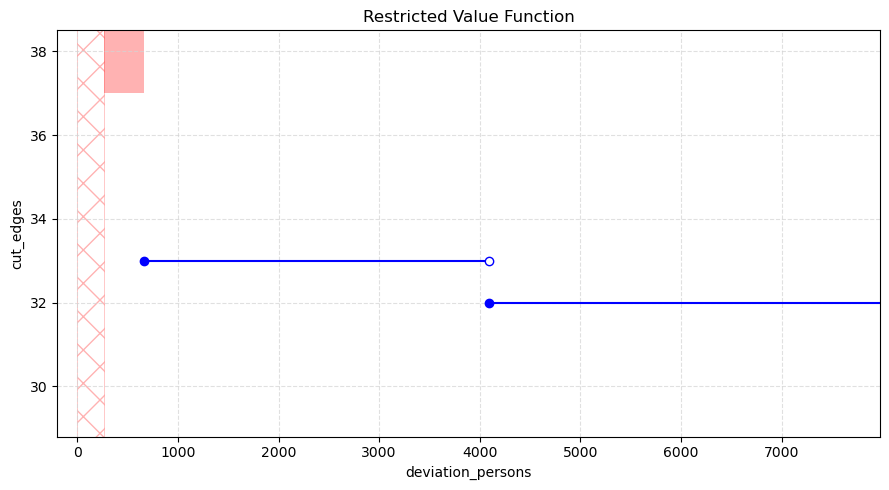

In [9]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state IA, objective cut_edges
####################################################################################################



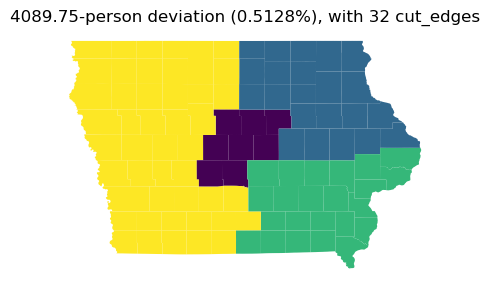

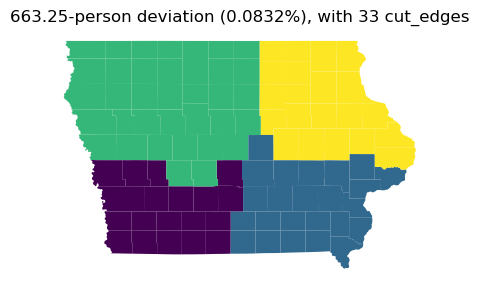

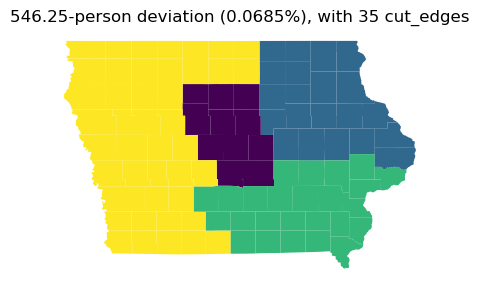

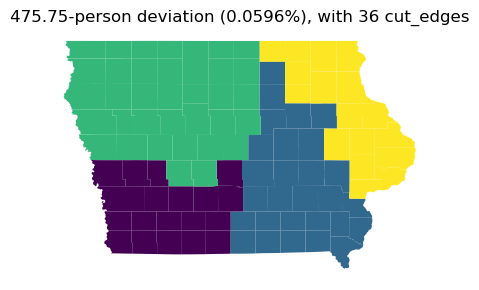

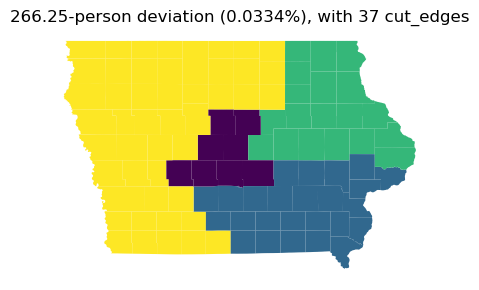

In [10]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)